# Feature analysis
Let's first see the importance of the different features before any computation.

In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import sys
sys.path.append('../../utils')
from utils import feature_selection, fs_driver

Text(0, 0.5, 'Feature')

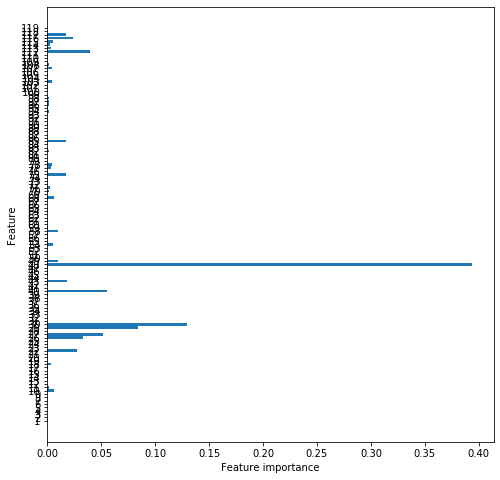

In [11]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = GradientBoostingClassifier(n_estimators=10,max_depth=5,random_state=0) 
tree.fit(data_train, target_train)
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Here we can see that many features have an impact on the decision but a few of them seem to have way more importance. Let's see what we get from selecting the best features for different dataset sizes.

In [14]:
feature_selection('../../../dumps/various_sizes/8K.csv', 'gradient')

Execution            # features  Features selected                   Training set acc    Test acc    Time (s)
-----------------  ------------  --------------------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']                           0.993856    0.993069    0.920995
K best features              18  ['f10','f22','f26','f27','f29',             0.994171    0.993699    0.253573
                                 'f30','f40','f43','f48','f49',
                                 'f54','f58','f68','f75','f85',
                                 'f112','f116','f117']
Iterative process             5  ['f26','f29','f40','f48','f117']            0.982199    0.982357    3.18253


The performances for the two first situations are quite similar even though a bit better for the second one in general. We can therefore conclude that in this case it's better to keep the best features, since it is even 75% faster.

What happens when applying the same procedure on a bigger dataset of around 16K samples ?

In [15]:
feature_selection('../../../dumps/various_sizes/16K.csv','gradient')

Execution            # features  Features selected                  Training set acc    Test acc    Time (s)
-----------------  ------------  -------------------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']                          0.991581    0.987843    1.89086
K best features              15  ['f22','f27','f29','f30','f40',            0.988619    0.984102    0.477152
                                 'f43','f48','f49','f58','f68',
                                 'f70','f76','f85','f92','f116']
Iterative process             8  ['f27','f30','f40','f43','f48',            0.984565    0.981297    6.52923
                                 'f58','f76','f116']


Here we have a slight decrease of performances but the time savings are enormous ! The loss of precision is therefore acceptable for the time we save (around 4 times faster).

In [16]:
fs_driver('../../../dumps/various_sizes/16K.csv','gradient',[0.005,0.01,0.05,0.1,0.2])

Threshold : 0.005000
Execution            # features  Features selected                  Training set acc    Test acc    Time (s)
-----------------  ------------  -------------------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']                          0.991581    0.987843    2.0408
K best features              15  ['f22','f27','f29','f30','f40',            0.988619    0.984102    0.892384
                                 'f43','f48','f49','f58','f68',
                                 'f70','f76','f85','f92','f116']
Iterative process             8  ['f27','f30','f40','f43','f48',            0.984565    0.981297    6.92981
                                 'f58','f76','f116']


Threshold : 0.010000
Execution            # features  Features selected                  Training set acc    Test acc    Time (s)
-----------------  ------------  -------------------------------  ------------------  ----------  ----------
Classic       

We could reduce our model to only feature 48 while loosing only 4-5% precision but using only 17% of the initial time !